<img src='https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQ-VfNtOyJbsaxu43Kztf_cv1mgBG6ZIQZEVw&usqp=CAU'>

# Procesamiento de Lenguaje Natural

## Proyecto Final: Libro de códigos
## Autor: Carlos Arturo Herrera Gutiérrez


In [24]:
import re
import pandas as pd 
from pprint import pprint

from nltk.corpus import stopwords
stopwords = stopwords.words('spanish')

import pyLDAvis.gensim_models
from gensim.models import LdaModel
from gensim.corpora import Dictionary

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
import random

In [30]:
# Lectura de datos

path = 'C:/Bases_kl/BDSalud.csv'
data = pd.read_csv(path,sep=";")
print(f"La base cuenta con {data.shape[0]:,d} documentos")
data.head()

La base cuenta con 801 documentos


,REGISTRO,HaciendoBien
0,9,"HASTA EL MOMENTO ME HAN ATENDIDO BIEN EN TODO,..."
1,16,CON LA CUESTIÓN DE PLANIFICAR CON EL YADEL NO ...
2,29,PARA MÍ LA ATENCIÓN ME ATIENDE BIEN.
3,32,POR QUE A LOS USUARIOS EN LA PANDEMIA ME ENVIA...
4,39,ESTA HACIUENDO BIEN HA LLEGADO MUCHO PERSONAL ...


In [32]:
#Realización del Preprocesamiento del texto

def pre_procesado(texto):
    texto = texto.lower()
    texto = re.sub(r"[\W\d]+", " ", texto)
    texto = [palabra for palabra in texto.split() if palabra not in stopwords]
    return texto 

data['Pre-Processed'] = data['HaciendoBien'].apply(lambda texto: pre_procesado(texto))

data.head()

,REGISTRO,HaciendoBien,Pre-Processed
0,9,"HASTA EL MOMENTO ME HAN ATENDIDO BIEN EN TODO,...","[momento, atendido, bien, siento, bien, satisf..."
1,16,CON LA CUESTIÓN DE PLANIFICAR CON EL YADEL NO ...,"[cuestión, planificar, yadel, ningún, inconven..."
2,29,PARA MÍ LA ATENCIÓN ME ATIENDE BIEN.,"[atención, atiende, bien]"
3,32,POR QUE A LOS USUARIOS EN LA PANDEMIA ME ENVIA...,"[usuarios, pandemia, enviaban, medicamento, casa]"
4,39,ESTA HACIUENDO BIEN HA LLEGADO MUCHO PERSONAL ...,"[haciuendo, bien, llegado, personal, hace, par..."


In [48]:
#Creación de diccionario

random.seed(1234)
dictionary = Dictionary(data['Pre-Processed'].values)
dictionary.filter_extremes(no_below=5, no_above=0.5) 
corpus = [dictionary.doc2bow(text) for text in data['Pre-Processed'].values]

In [90]:
#Entrenamiento del Modelo de LDA

model = LdaModel(corpus = corpus, id2word = dictionary, num_topics = 10, passes=400)

In [91]:
#Visualización de LDA

lda_display = pyLDAvis.gensim_models.prepare(model, corpus, dictionary,sort_topics='True')
pyLDAvis.display(lda_display)

In [92]:
#Presentación de las 15 palabras más representativas para cada uno de los temas

model.print_topics(num_words=15)

[(0,
  '0.464*"bien" + 0.119*"atendido" + 0.057*"parece" + 0.049*"citas" + 0.040*"atiende" + 0.030*"veces" + 0.027*"examenes" + 0.018*"ido" + 0.017*"mandan" + 0.017*"momento" + 0.017*"consulta" + 0.014*"demoran" + 0.014*"super" + 0.014*"voy" + 0.014*"hacen"'),
 (1,
  '0.354*"servicio" + 0.138*"bueno" + 0.114*"buen" + 0.061*"estan" + 0.050*"citas" + 0.036*"medicas" + 0.035*"pendientes" + 0.023*"pacientes" + 0.022*"dia" + 0.021*"personal" + 0.018*"prestan" + 0.018*"calidad" + 0.018*"persona" + 0.018*"presta" + 0.014*"asignacion"'),
 (2,
  '0.231*"medicamentos" + 0.129*"pandemia" + 0.065*"entrega" + 0.065*"especialistas" + 0.065*"ahora" + 0.062*"si" + 0.043*"prueba" + 0.038*"covid" + 0.032*"gente" + 0.027*"ser" + 0.027*"controles" + 0.026*"casa" + 0.022*"coosalud" + 0.022*"voy" + 0.022*"enferma"'),
 (3,
  '0.452*"atencion" + 0.251*"buena" + 0.056*"citas" + 0.043*"rapidas" + 0.040*"usuario" + 0.038*"autorizaciones" + 0.025*"cliente" + 0.015*"rapida" + 0.010*"atentos" + 0.010*"pues" + 0.009

In [93]:
#Función que indica la probabilidad que tiene cada uno de los documentos de pertenecer a uno o más temas
def get_doc_top_n(text_processed, n):
    d= dictionary.doc2bow(text_processed)
    topics=dict(model.get_document_topics(d))
    try:
        return topics[n]
    except:
        return None

In [94]:
#Visualización de la correspondencia documentos vs temas
for t in range(0,8):
    top_name=f"tema_{t}"
    data[top_name]=data['Pre-Processed'].apply(lambda doc: get_doc_top_n(doc, t))


In [95]:
data

,REGISTRO,HaciendoBien,Pre-Processed,tema_0,tema_1,tema_2,tema_3,tema_4,tema_5,tema_6,tema_7
0,9,"HASTA EL MOMENTO ME HAN ATENDIDO BIEN EN TODO,...","[momento, atendido, bien, siento, bien, satisf...",0.819990,0.020000,0.020000,0.020000,0.020000,0.020000,0.020002,0.020000
1,16,CON LA CUESTIÓN DE PLANIFICAR CON EL YADEL NO ...,"[cuestión, planificar, yadel, ningún, inconven...",0.025000,0.025000,0.025008,0.025000,0.274999,0.025000,0.025001,0.524978
2,29,PARA MÍ LA ATENCIÓN ME ATIENDE BIEN.,"[atención, atiende, bien]",0.524997,0.025000,0.025000,0.025000,0.025000,0.025000,0.025003,0.025000
3,32,POR QUE A LOS USUARIOS EN LA PANDEMIA ME ENVIA...,"[usuarios, pandemia, enviaban, medicamento, casa]",0.025000,0.025000,0.377788,0.025000,0.025000,0.025000,0.025000,0.025000
4,39,ESTA HACIUENDO BIEN HA LLEGADO MUCHO PERSONAL ...,"[haciuendo, bien, llegado, personal, hace, par...",0.300006,0.171941,0.285218,0.014287,0.014286,0.014286,0.014290,0.014289
...,...,...,...,...,...,...,...,...,...,...,...
796,5290,LE HAN ATENDIDO EN LO QUE REQUIERE,"[atendido, requiere]",0.549999,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000
797,5294,AISGNAN LAS CITAS CON UN LIMITE DE TIEMPO QUE ...,"[aisgnan, citas, limite, tiempo, permiten, asi...",0.033335,0.033335,0.033333,0.033335,0.033333,0.033333,0.033333,0.699995
798,5299,NO SE QUE DECIRLE,[decirle],0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000
799,5309,ME GUSTA LA ATENCION Y LAS PRUEVAS DE COVI,"[gusta, atencion, pruevas, covi]",0.033334,0.033340,0.033344,0.699934,0.033334,0.033334,0.033334,0.033334


In [96]:
#Visualización de los documentos más representativos por cada uno de los temas
for t in range(0,8):
    print(f"+++++++++++++++++++++++TEMA {t} ++++++++++++++++++++++")
    topic=f"tema_{t}"
    for i,entrevista in enumerate(data.sort_values(topic, ascending=False)['HaciendoBien'].values[:5]):
        print(f"Entrevista #{i}")
        print(entrevista[:200])
        print()
    print()    

+++++++++++++++++++++++TEMA 0 ++++++++++++++++++++++
Entrevista #0
ABSOLUTAMENTE BIEN, BUENO COMO YO TENGO RATO QUE NO VOY CITAS, SUPER BIEN, POR QUE LAS COSAS DE CUANDO ME ENFERMO ME ATIENDE BIEN , LAS COSAS DEL BRAZO TAMBIEN

Entrevista #1
A MI ME HAN ATENDIDO MUY BIEN, Y A MI PAPA Y A MIS HIJAS QUE TAMBIEN LO TIENEN, NOS HAN ATENDIDO BIEN, NO NOS HAN DISCRIMINADO POR NADA, PUES QUE A VECES UNO NO ENCUENTRA LA DROGA O TENERSE QUE DIRIGI

Entrevista #2
ME PARECE QUE BIEN TODO HASTA EL MOMENTO LA HAN ATENDIDO BIEN

Entrevista #3
LAS VECES QUE HA IDO LE ATENDIDO BIEN

Entrevista #4
LAS VECES QUE HE IDO ME HAN ATENDIDO BIEN Y RAPIDAMENTE


+++++++++++++++++++++++TEMA 1 ++++++++++++++++++++++
Entrevista #0
CITAS MEDICAS Y BUEN SERVICIO

Entrevista #1
ASIGNACION DE CITAS SIN DEMORA Y ESTAN PENDIENTES DE LO QUE NECESITEN

Entrevista #2
EL SERVICIO,BUEN SERVICIO

Entrevista #3
CALIDAD DEL SERVICIO ES BUENO

Entrevista #4
SERVICIO BUENO Y  LE PERSONAL


+++++++++++++++++++++++TEMA 2 +++++++++

In [99]:
documento=pd.read_csv("C:/Bases_kl/BDSalud.csv",sep=";")             
documento.head()

,REGISTRO,HaciendoBien
0,9,"HASTA EL MOMENTO ME HAN ATENDIDO BIEN EN TODO,..."
1,16,CON LA CUESTIÓN DE PLANIFICAR CON EL YADEL NO ...
2,29,PARA MÍ LA ATENCIÓN ME ATIENDE BIEN.
3,32,POR QUE A LOS USUARIOS EN LA PANDEMIA ME ENVIA...
4,39,ESTA HACIUENDO BIEN HA LLEGADO MUCHO PERSONAL ...


In [103]:
def pre_procesado(texto):
    texto = texto.lower()
    texto = re.sub(r"[\W\d_]+", " ", texto)
    texto = [palabra for palabra in texto.split() if palabra not in stopwords]
    texto = " ".join(texto)
    return texto

documento['preprocesado'] = documento.HaciendoBien.apply(lambda texto: pre_procesado(texto))
documento.head()

,REGISTRO,HaciendoBien,preprocesado
0,9,"HASTA EL MOMENTO ME HAN ATENDIDO BIEN EN TODO,...",momento atendido bien siento bien satisfecha
1,16,CON LA CUESTIÓN DE PLANIFICAR CON EL YADEL NO ...,cuestión planificar yadel ningún inconveniente...
2,29,PARA MÍ LA ATENCIÓN ME ATIENDE BIEN.,atención atiende bien
3,32,POR QUE A LOS USUARIOS EN LA PANDEMIA ME ENVIA...,usuarios pandemia enviaban medicamento casa
4,39,ESTA HACIUENDO BIEN HA LLEGADO MUCHO PERSONAL ...,haciuendo bien llegado personal hace parte ali...


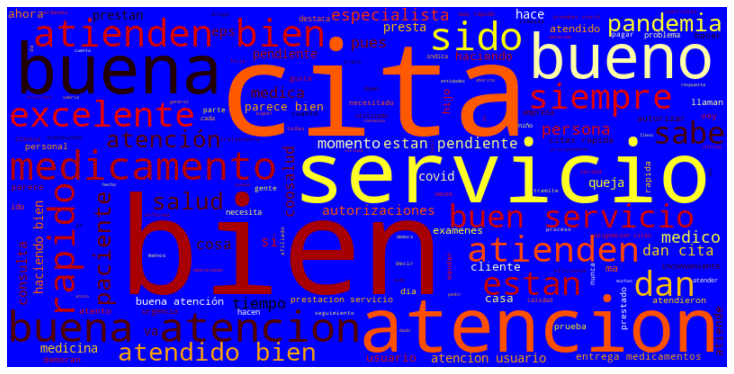

In [106]:
#Nube de palabras
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt
import PIL.Image
from IPython.display import display

palabras = documento.preprocesado.str.cat(sep=" ")
wordcloud = WordCloud(width=800, height=400,
                      max_font_size=150, max_words=150,
                      background_color="blue", colormap="hot",
                      stopwords=stopwords, collocations=True).generate(palabras) 

plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()